In [90]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn

In [82]:
df = pd.read_csv("/content/bostonHousing.csv")

In [48]:
df.shape

(506, 14)

In [49]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'ISTAT', 'PRICE'],
      dtype='object')

In [50]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
ISTAT      float64
PRICE      float64
dtype: object

In [51]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
ISTAT      455
PRICE      229
dtype: int64

In [52]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
ISTAT      0
PRICE      0
dtype: int64

In [53]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, ISTAT, PRICE]
Index: []

In [54]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            ISTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [55]:
corr = df.corr()
corr.shape

(14, 14)

In [57]:
X = df.drop(['PRICE'], axis=1).values
y = df['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[13])
])

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)

test_loss = model.evaluate(X_test, y_test,verbose = 0)

print('Test loss:', test_loss)

Test loss: 54.828147888183594


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
12/12 [==============================] - 1s 13ms/step - loss: 588.1054 - mae: 19.9312 - val_loss: 501.4376 - val_mae: 18.3371
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 199.7274 - mae: 11.5649 - val_loss: 87.7490 - val_mae: 6.5555
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 89.4413 - mae: 7.0252 - val_loss: 107.5129 - val_mae: 8.2943
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 74.8030 - mae: 6.3505 - val_loss: 93.1207 - val_mae: 6.8379
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 63.2091 - mae: 5.9441 - val_loss: 83.6484 - val_mae: 6.4523
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 60.6281 - mae: 5.7663 - val_loss: 85.2802 - val_mae: 6.4315
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 59.2748 - mae: 5.6738 - val_loss: 83.5452 - val_mae: 6.2634
Epoch 8/100
12/12 [==============================] - 0s 3ms/s

In [17]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

4/4 [==============================] - 0s 4ms/step - loss: 26.5592 - mae: 4.1353
Mean squared error on test data:  26.559167861938477
Mean absolute error on test data:  4.135277271270752


<ipython-input-63-d089717e2e07>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PRICE'], bins=30, kde=True)


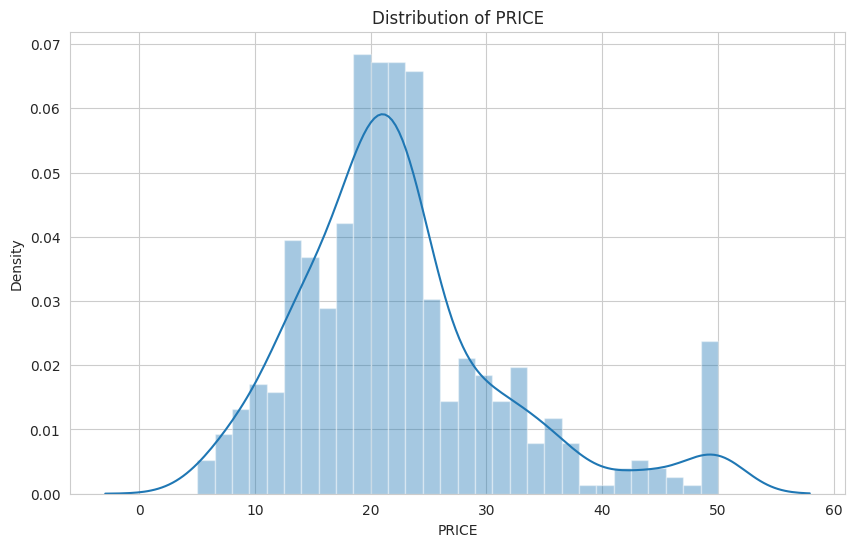

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.distplot(df['PRICE'], bins=30, kde=True)
plt.title('Distribution of PRICE')
plt.xlabel('PRICE')
plt.show()

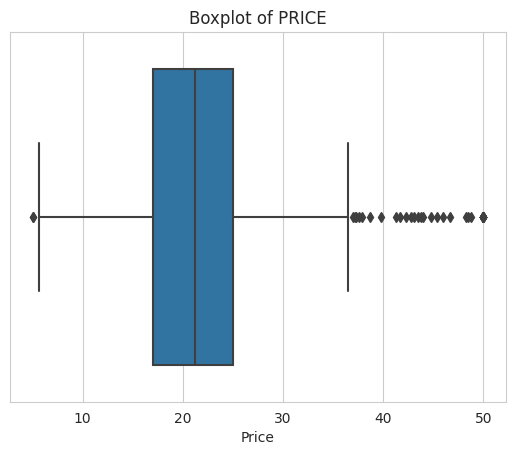

In [66]:
sns.boxplot(x=df['PRICE'])
plt.title('Boxplot of PRICE')
plt.xlabel('Price')
plt.show()

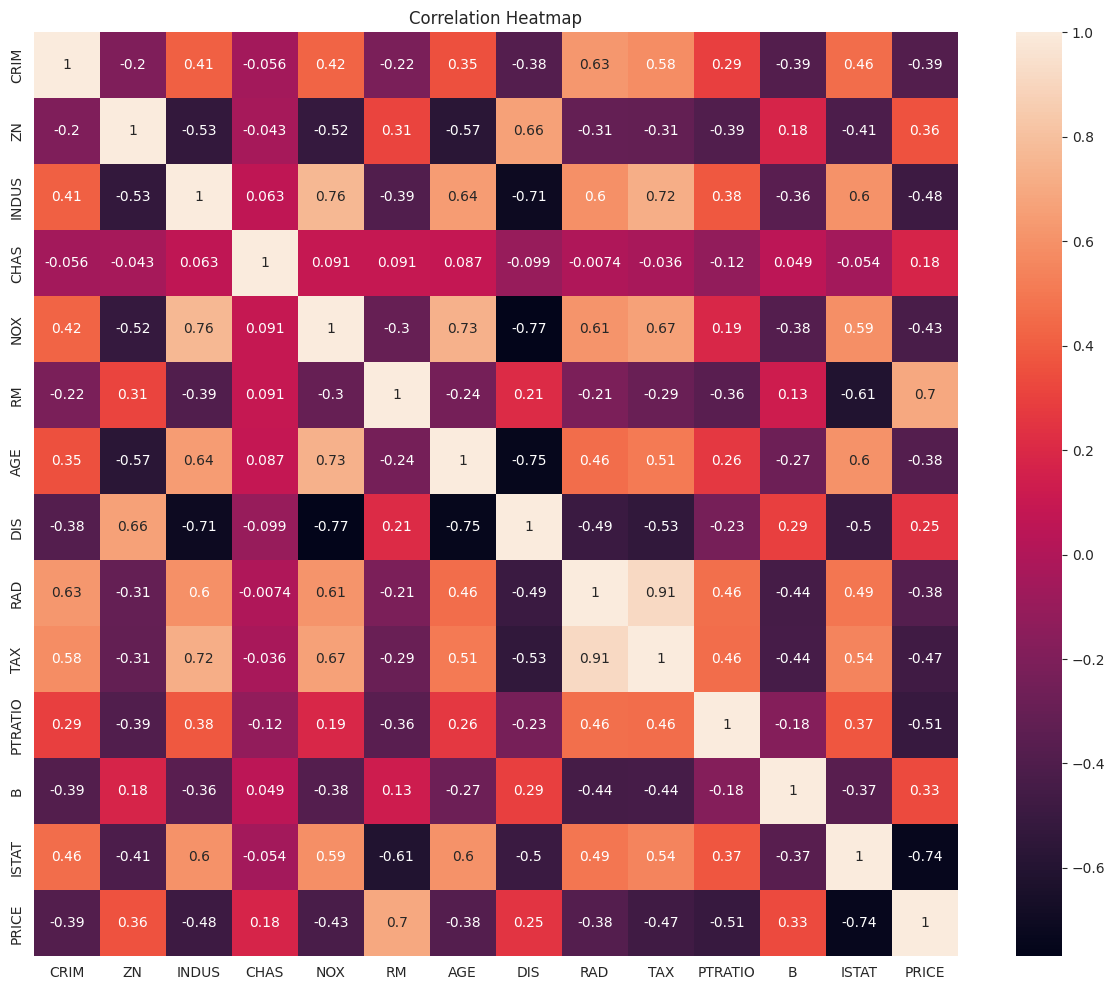

In [69]:
correlation = df.corr()

fig, axes = plt.subplots(figsize=(15, 12))
sns.heatmap(correlation, square=True, annot=True)

plt.title('Correlation Heatmap')
plt.show()


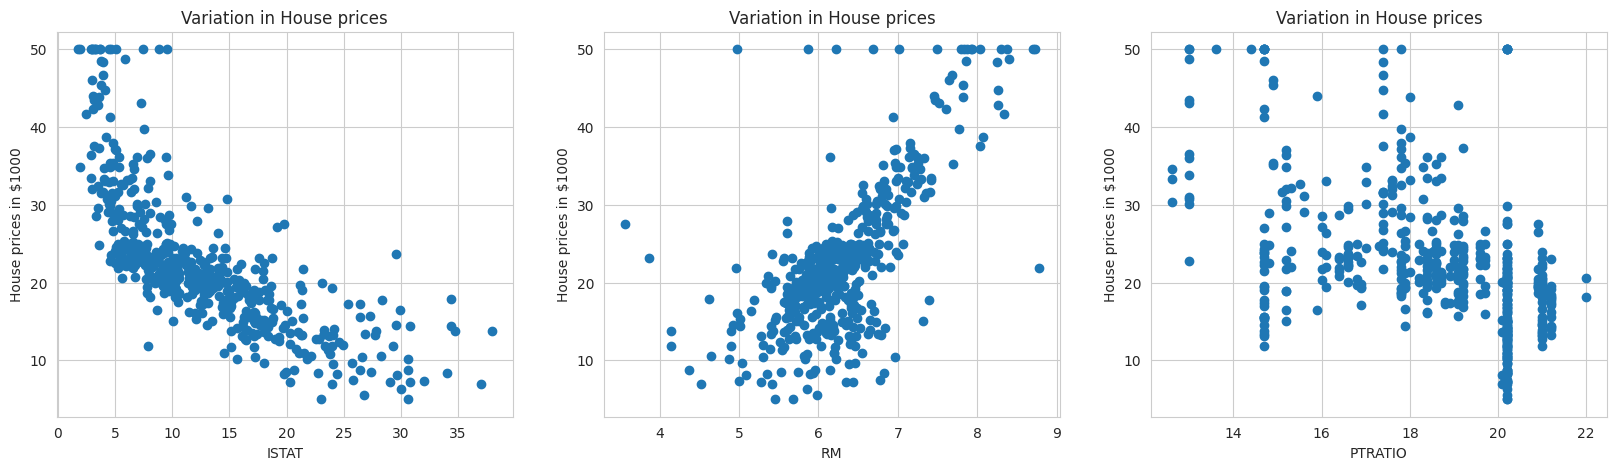

In [76]:
plt.figure(figsize=(20, 5))
features = ['ISTAT', 'RM', 'PTRATIO']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = df[col]
    y = df['PRICE']
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('House prices in $1000')

plt.show()


In [78]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                           name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                           name='Valid'))

fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

In [79]:
fig.add_trace(go.Scattergl(y=history.history['mae'],
                           name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_mae'],
                           name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Mean Absolute Error')

In [80]:
y_pred = model.predict(X_test)
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

4/4 [==============================] - 0s 4ms/step - loss: 23.8140 - mae: 3.8483
Mean squared error on test data:  23.81401824951172
Mean absolute error on test data:  3.848289966583252


In [87]:
from sklearn.metrics import mean_absolute_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print('Mean squared error on test data: ',mse_lr)
print('Mean absolute error on test data: ', mae_lr)


r2 = r2_score(y_test, y_pred)
print(r2)

Mean squared error on test data:  24.291119474973485
Mean absolute error on test data:  3.189091965887834
0.6752654048969747


In [88]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

4.879960694712667


In [91]:
new_data = sklearn.preprocessing.StandardScaler().fit_transform(([[0.1, 10.0, 5.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 20, 300, 10]]))
prediction = model.predict(new_data)
print("Predicted house price:", prediction)

1/1 [==============================] - 0s 20ms/step
Predicted house price: [[0.12178192]]
